## 06 - Colour Images
### Part 1 - Processing images in different colour spaces

Colour in images can be codified using different models. The most often used is the additive RGB model, in which each pixel is codified by 3 bytes, each corresponding to the amount of Red, Green and Blue light that contributes to that specific pixel.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio

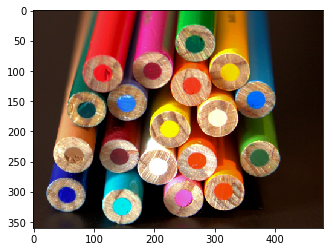

In [72]:
img = imageio.imread("images/pencil.png")
plt.imshow(img)
plt.show()

Text(0.5,1,'Blue')

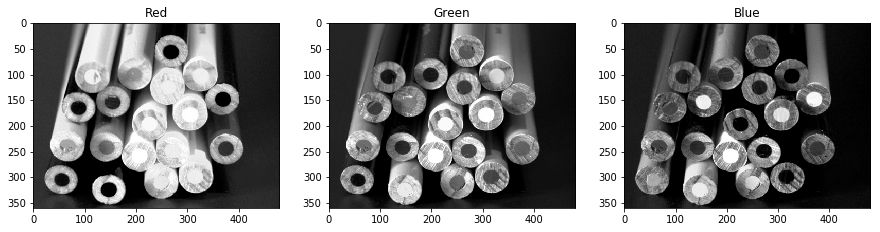

In [73]:
# showing each channel separately
plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(img[:,:,0], cmap="gray"); plt.title("Red")
plt.subplot(132); plt.imshow(img[:,:,1], cmap="gray"); plt.title("Green")
plt.subplot(133); plt.imshow(img[:,:,2], cmap="gray"); plt.title("Blue")

This way we can decompose the image into three matrices and process them. For example, we could increase the brighness of only RED channel

Text(0.5,1,'adding to blue channel')

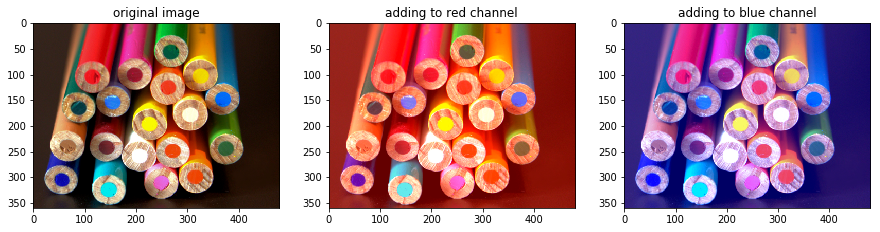

In [74]:
# adding to R channel to process the image
img_redb = np.array(img, copy=True).astype(np.uint32)
img_redb[:,:,0] = np.clip(img_redb[:,:,0]+100, 0, 255)

# adding to B channel to process the image
img_blub = np.array(img, copy=True).astype(np.uint32)
img_blub[:,:,2] = np.clip(img_blub[:,:,2]+100, 0, 255)

plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(img); plt.title("original image")
plt.subplot(132); plt.imshow(img_redb); plt.title("adding to red channel")
plt.subplot(133); plt.imshow(img_blub); plt.title("adding to blue channel")

Colour channels may be also mixed to create effects


Text(0.5,1,'mixing colours')

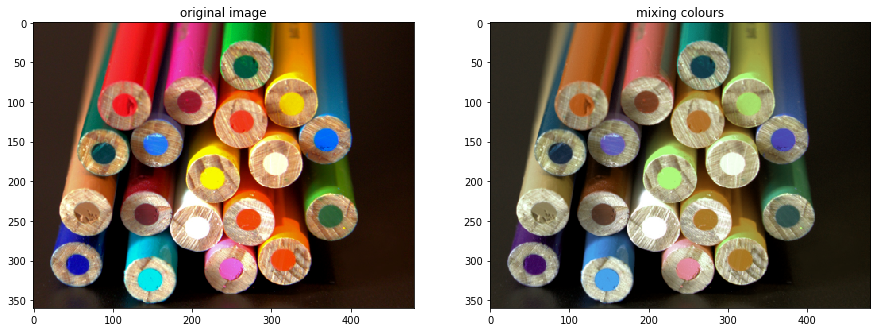

In [88]:
# adding to R channel to process the image
img_colormix = np.array(img, copy=True).astype(np.uint32)
img_colormix[:,:,1] = np.clip(0.7*img[:,:,1].astype(np.uint32) + 0.3*img[:,:,0].astype(np.uint32), 0, 255)
img_colormix[:,:,0] = np.clip(0.7*img[:,:,0].astype(np.uint32) + 0.3*img[:,:,2].astype(np.uint32), 0, 255)
img_colormix[:,:,2] = np.clip(0.5*img[:,:,2].astype(np.uint32) + 0.5*img[:,:,1].astype(np.uint32), 0, 255)

plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(img); plt.title("original image")
plt.subplot(122); plt.imshow(img_colormix); plt.title("mixing colours")


### Processing colour images

In order to process colour images, for example enhance them, we could repeat the process in all channels individually.
However, this may have undersired effect, creating the colours to be unbalanced.

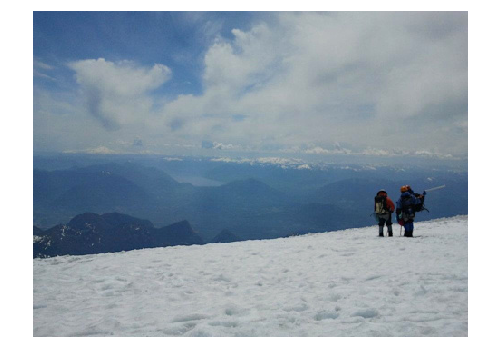

In [125]:
img = imageio.imread("images/mountain.jpg")
plt.figure(figsize=(12,6))
plt.imshow(img); plt.axis('off')
plt.show()

In [143]:
def gamma_enhancement(img, gamma):
    R = 255.0
    return (R * np.power(img / R, gamma)).astype(np.uint8)

def gamma_enhancement_rgb(img, gamma):
    img_proc = np.zeros(img.shape).astype(np.uint32)
    img_proc[:,:,0] = gamma_enhancement(img[:,:,0],gamma=gamma)
    img_proc[:,:,1] = gamma_enhancement(img[:,:,1],gamma=gamma)
    img_proc[:,:,2] = gamma_enhancement(img[:,:,2],gamma=gamma)
    return img_proc.astype(np.uint8)

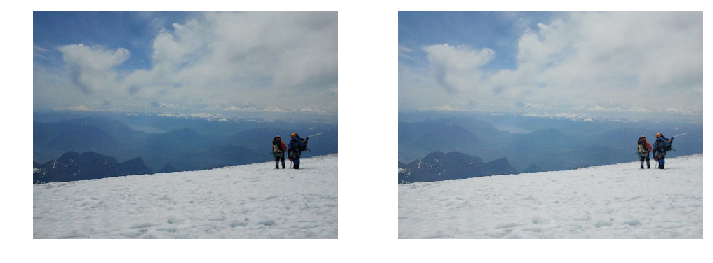

In [166]:
img_ga = gamma_enhancement_rgb(img,0.7)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img); plt.axis('off')
plt.subplot(122)
plt.imshow(img_ga); plt.axis('off')
plt.show()

### Processing images in alternative colour systems

For example HSV decomposes the chromatic component, or Hue (H), the saturation of each color (S) and the value (V) which is the illumination component. Therefore, we may process only the channel we are interested.

Let us show each channel (H - S - V) separately for inspection.

Text(0.5,1,'Value')

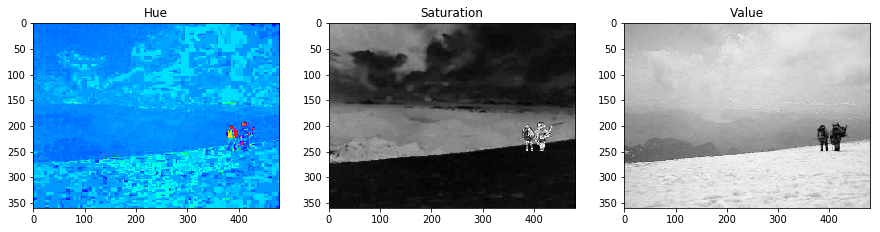

In [173]:
img_hsv = mpl.colors.rgb_to_hsv(img)
plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(img_hsv[:,:,0], cmap="hsv"); plt.title("Hue");
plt.subplot(132); plt.imshow(img_hsv[:,:,1], cmap="gray"); plt.title("Saturation")
plt.subplot(133); plt.imshow(img_hsv[:,:,2], cmap="gray"); plt.title("Value")

In [174]:
# now this function applies the gamma correction only on V channel
# without modifying any chromatic component
def gamma_enhancement_hsv(img, gamma):
    img_hsv = mpl.colors.rgb_to_hsv(img)
    img_hsv[:,:,2] = gamma_enhancement(img_hsv[:,:,2].astype(np.uint32), gamma=gamma)
    
    return mpl.colors.hsv_to_rgb(img_hsv).astype(np.uint8)



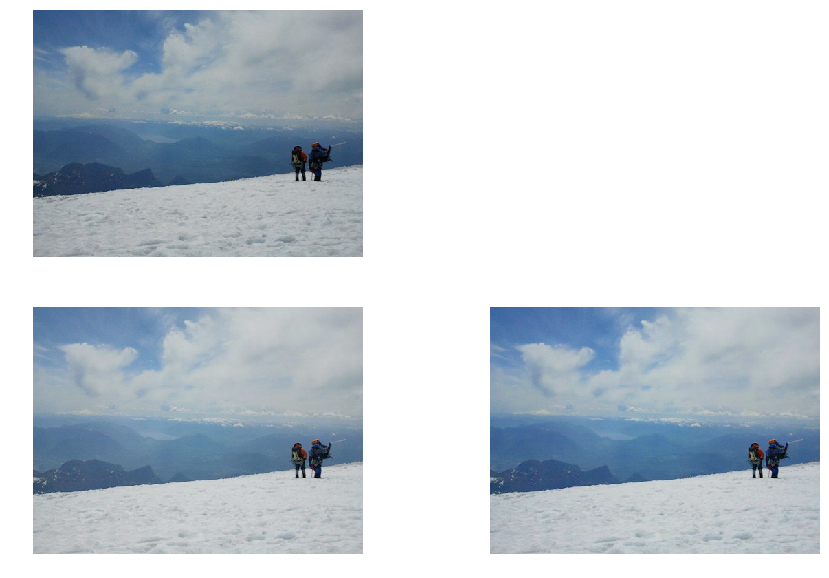

In [175]:
img_ga_hsv = gamma_enhancement_hsv(img,0.7)

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(img); plt.axis('off')
plt.subplot(223)
plt.imshow(img_ga); plt.axis('off')
plt.subplot(224)
plt.imshow(img_ga_hsv); plt.axis('off')
plt.show()
